In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read data from CSV
data = pd.read_csv('stockData.csv', index_col='date')
# take 1-505 rows
data = data.iloc[800:1200]
# print the number of columns in the data
print("Number of columns in the data:", len(data.columns))
# print the number of rows in the data
print("Number of rows in the data:", len(data))



ValueError: Index Dates invalid

In [48]:
# Step 2: Calculate returns
# take only the first 10 stocks
returns = data.pct_change().dropna()
# print the returns along with their stock names
# print(returns)


# Step 3: Calculate covariance matrix of returns
cov_matrix = returns.cov()
# print the covariance matrix
print(cov_matrix)



          AAPL      ADBE      AMZN        BA       BLK      CSCO       IBM  \
AAPL  0.000167  0.000069  0.000086  0.000047  0.000053  0.000050  0.000026   
ADBE  0.000069  0.000212  0.000093  0.000060  0.000072  0.000064  0.000043   
AMZN  0.000086  0.000093  0.000254  0.000038  0.000047  0.000050  0.000025   
BA    0.000047  0.000060  0.000038  0.000176  0.000076  0.000042  0.000054   
BLK   0.000053  0.000072  0.000047  0.000076  0.000158  0.000069  0.000063   
CSCO  0.000050  0.000064  0.000050  0.000042  0.000069  0.000141  0.000047   
IBM   0.000026  0.000043  0.000025  0.000054  0.000063  0.000047  0.000126   
JPM   0.000050  0.000056  0.000033  0.000076  0.000118  0.000061  0.000057   
MSFT  0.000073  0.000105  0.000103  0.000045  0.000070  0.000063  0.000041   
NVDA  0.000108  0.000139  0.000112  0.000060  0.000070  0.000076  0.000059   

           JPM      MSFT      NVDA  
AAPL  0.000050  0.000073  0.000108  
ADBE  0.000056  0.000105  0.000139  
AMZN  0.000033  0.000103  0.00

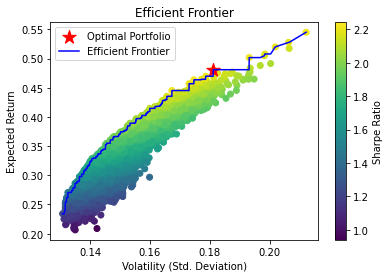

Optimal Portfolio:
Expected return: 0.4810284732873831
Volatility (Std. Deviation): 0.18114681466494972
Sharpe Ratio: 2.2414331382993176
Weights of the optimal portfolio corresponding to maximum Sharpe ratio:
AAPL : 7.16 %
ADBE : 9.88 %
AMZN : 6.75 %
BA : 22.7 %
BLK : 9.87 %
CSCO : 8.32 %
IBM : 2.42 %
JPM : 5.82 %
MSFT : 0.23 %
NVDA : 26.84 %


In [49]:
# Step 4: Simulate random portfolios
num_portfolios = 20000
results = np.zeros((4, num_portfolios))
risk_free_rate = 0.075
max_sharpe_weight = None

for i in range(num_portfolios):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    results[3, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    
    if sharpe_ratio == np.max(results[2]):
        max_sharpe_weight = weights

# Step 5: Identify optimal portfolio
max_sharpe_idx = np.argmax(results[2])
optimal_return = results[0, max_sharpe_idx]
optimal_std_dev = results[1, max_sharpe_idx]
optimal_sharpe_ratio = results[2, max_sharpe_idx]

# Step 6: Plot efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_std_dev, optimal_return, marker='*', color='r', s=200, label='Optimal Portfolio')

# Sort the data based on volatility
sorted_idx = np.argsort(results[1])
sorted_returns = results[0, sorted_idx]
sorted_volatility = results[1, sorted_idx]

# Plotting the line joining points with maximum return for a given level of risk
max_return_for_given_volatility = np.maximum.accumulate(sorted_returns)
# plot a smooth curve for the maximum return for a given level of risk
plt.plot(sorted_volatility, max_return_for_given_volatility, label='Efficient Frontier', color='b')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

print("Optimal Portfolio:")
print("Expected return:", optimal_return)
print("Volatility (Std. Deviation):", optimal_std_dev)
print("Sharpe Ratio:", optimal_sharpe_ratio)
print("Weights of the optimal portfolio corresponding to maximum Sharpe ratio:")
# print the stock names along with their weights
for i in range(len(data.columns)):
    # round the weights to 4 decimal places and multiply by 100 to get percentage
    print(data.columns[i], ":", round(max_sharpe_weight[i]*100, 2), "%")


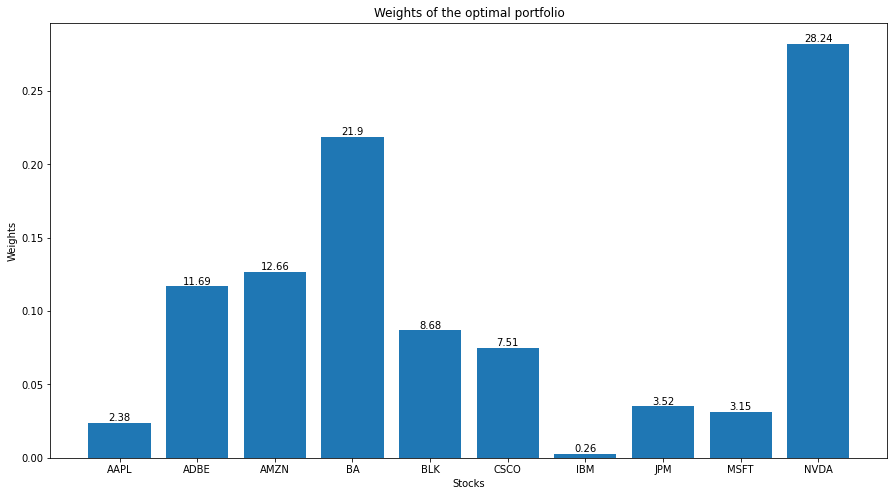

In [45]:
# plot bar chart for the weights of the optimal portfolio
# ignore the zero weights
max_sharpe_weight2 = max_sharpe_weight[max_sharpe_weight > 0]
plt.figure(figsize=(15, 8))
plt.bar(data.columns, max_sharpe_weight2)
for i in range(len(data.columns)):
    plt.text(i, max_sharpe_weight2[i], round(max_sharpe_weight2[i]*100, 2), ha='center', va='bottom')
# increase the size of the plot
plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Weights of the optimal portfolio')
plt.show()

Test Days:  166
Test Period:  606  to  772
Expected Return:  -0.05084809031245966
Volatility:  0.19338961818257044
Sharpe Ratio:  -0.6507489465833276


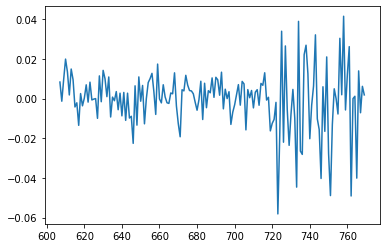

---------------------------------------------------


In [46]:
stockData = pd.read_csv("stockDataUS.csv")

testStart = 606
testEnd = 771
testDays = testEnd - testStart + 1
print("Test Days: ", testDays)
testEnd = testStart + testDays
portfolio_test = stockData.iloc[testStart:testEnd, :]
portfolio_test = portfolio_test.drop(portfolio_test.columns[0], axis=1)
returns = portfolio_test.pct_change().dropna()
cov_matrix = returns.cov()
portfolio_return = np.sum(returns.mean() * weights) * testDays
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(testDays)
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
# print the expected return, volatility and sharpe ratio and test period in a table
print("Test Period: ", testStart, " to ", testEnd)
print("Expected Return: ", portfolio_return)
print("Volatility: ", portfolio_std_dev)
print("Sharpe Ratio: ", sharpe_ratio)

daily_returns = portfolio_test.pct_change()
daily_returns = daily_returns.dropna()
daily_returns = daily_returns * weights
daily_returns = daily_returns.sum(axis=1)
plt.plot(daily_returns)
plt.show()
print("---------------------------------------------------")

    
